# Outline of the Process
      
1. Installing and importing all the required libraries
2. Importing the Dataset
3. Filtering and Cleaning the Dataset
    * Removing unimportant columns
    * Filling null values 
    * Label encoding the features of the dataset
    * Type conversion of features
4. Splitting the dataset
5. Building models and evaluating them (Without Preprocessing the data)
    * Linear Regression model
    * Decision Tree model
    * Random Forest model
    * Ordianry Least Squared Model
    * Support Vector Regressor Model
    * AdaBoost Regressor Model
    * Bagging Regressor Model
    * Gradient Boost Regressor Model
    * XG Boost Regressor Model
6. Preprocessing the dataset (Scaling)
    * Standard Scale
    * Robust Scale
7. Bulding models with preprocessed data and evaluating them
    * Linear Regression model
    * Decision Tree model
    * Random Forest model
    * Ordinary Least Squared Model
    * Support Vector Regressor Model
    * AdaBoost Regressor Model
    * Bagging Regressor Model
    * Gradient Boost Regressor Model
    * XG Boost Regressor Model
8. Summary of Models' performances
9. Flight Ticket Fare Prediction

# 1. Importing required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor

!pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 525.1 kB/s eta 0:03:10
   ---------------------------------------- 0.4/99.8 MB 2.8 MB/s eta 0:00:36
    --------------------------------------- 1.5/99.8 MB 8.2 MB/s eta 0:00:13
   - -------------------------------------- 3.0/99.8 MB 12.8 MB/s eta 0:00:08
   -- ------------------------------------- 6.2/99.8 MB 22.0 MB/s eta 0:00:05
   --- ------------------------------------ 8.7/99.8 MB 27.9 MB/s eta 0:00:04
   --- ------------------------------------ 8.7/99.8 MB 27.9 MB/s eta 0:00:04
   ---- ----------------------------------- 11.3/99.8 MB 46.7 MB/s eta 0:00:02
   ---- ----------------------------------- 12.2/99.8 MB 46.7 MB/s eta 0:00:02
   ----- ---------------------------------- 14.8/99.8 MB 43.7 MB/s eta 0:00:02
   ------- -------------------------------- 17.7/99.8 MB 46.7 MB/s et

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## 2. Importing the Dataset

In [6]:
data = pd.read_excel(r'D:\DSCI_6007_TEAM_09_FINALPROJECT\Data_Train.xlsx')
# dataset link = https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

## 3. Filtering and Cleaning the dataset

Removing unimportant columns, null valued columns, Label encoding of Columns, type conversions etc

In [7]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
data.shape

(10683, 11)

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
data.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [13]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [16]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [18]:
data.dropna(inplace = True)

In [19]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [21]:
#Duration
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][: -1])
        minutes = int(duration.split()[1][: -1])
        return hours * 60 + minutes
    else:
        return int(duration[: -1]) * 60

In [22]:
data['Duration'] = data['Duration'].apply(convert_duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [23]:
# departure and arrival time
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.dtypes

C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\3775088407.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\3775088407.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])


Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [24]:
data['Dep_Time_in_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_in_minutes'] = data['Dep_Time'].dt.minute
data['Arrival_Time_in_hours'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_in_minutes'] = data['Arrival_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-04-23 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-23 05:50:00,2024-04-23 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-23 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-04-23 18:05:00,2024-04-23 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-04-23 16:50:00,2024-04-23 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [25]:
data.drop(['Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [28]:
#date of journey

data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [29]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

In [30]:
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [31]:
data.drop('Date_of_Journey',axis = 1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [32]:
#Total stops
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [33]:
data['Total_Stops'] = data['Total_Stops'].map({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
})

In [34]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


In [35]:
# additional info

data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [36]:
data.drop('Additional_Info', axis = 1, inplace = True)

In [37]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [38]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

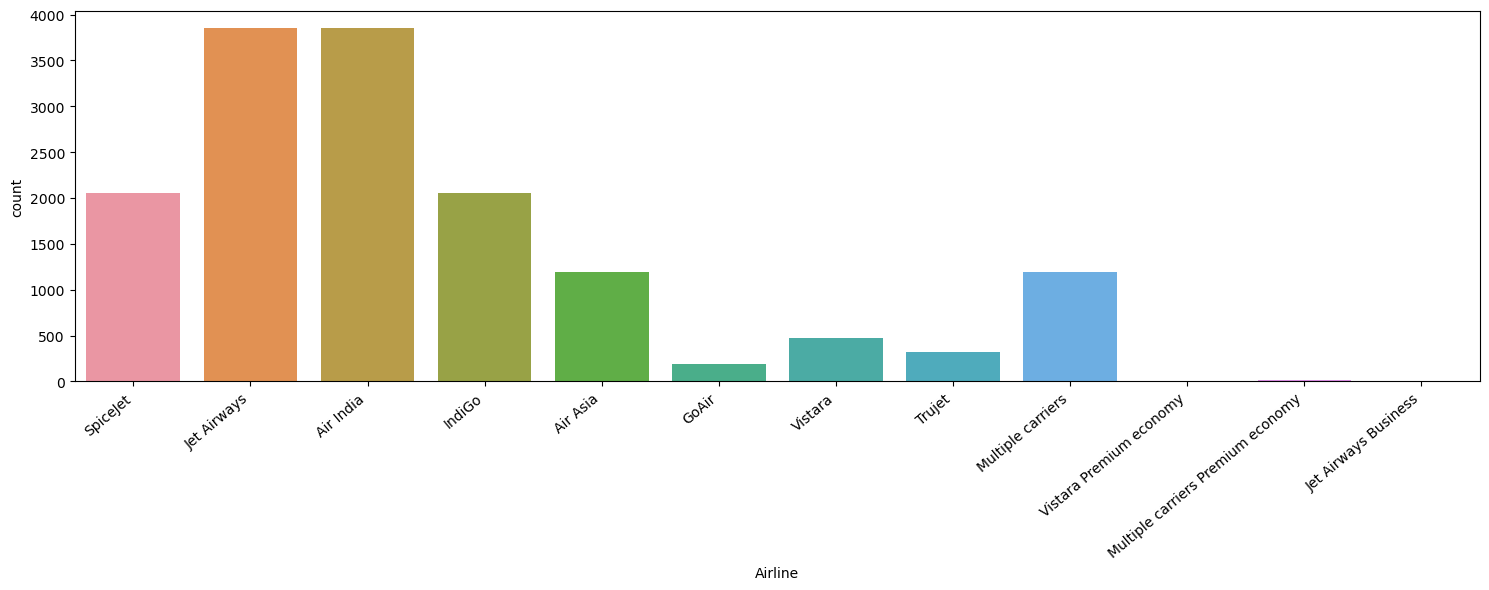

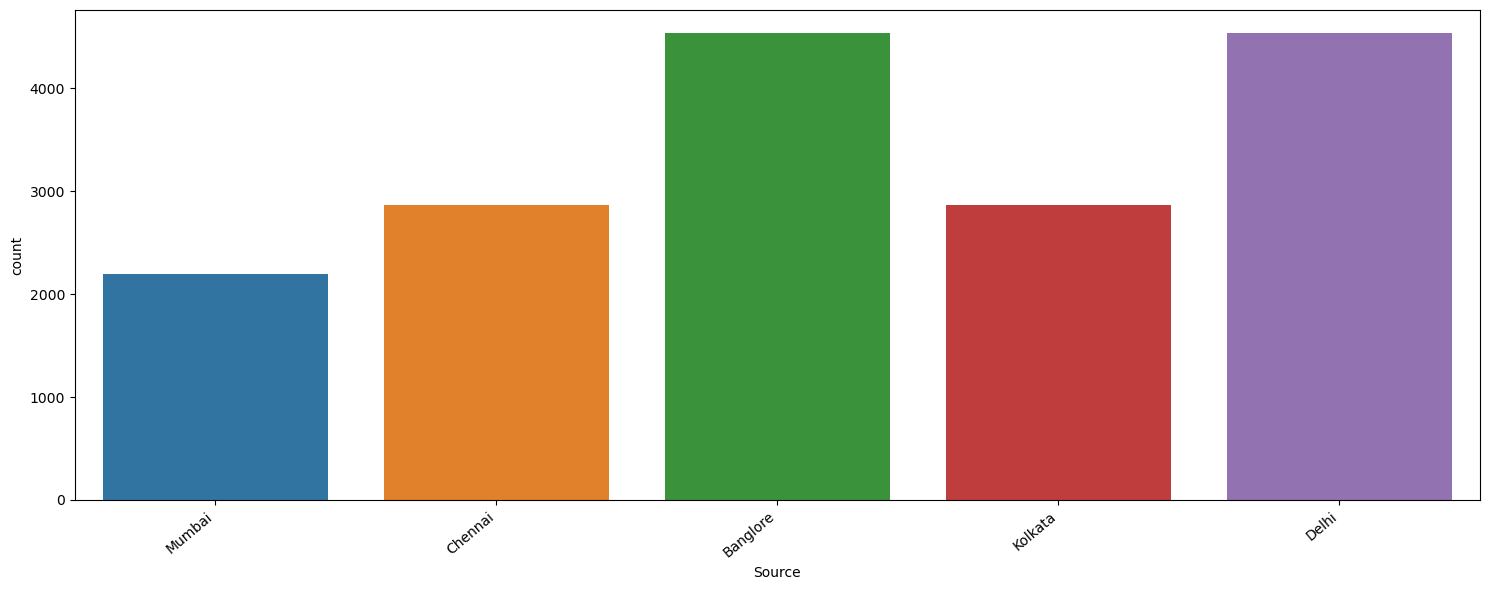

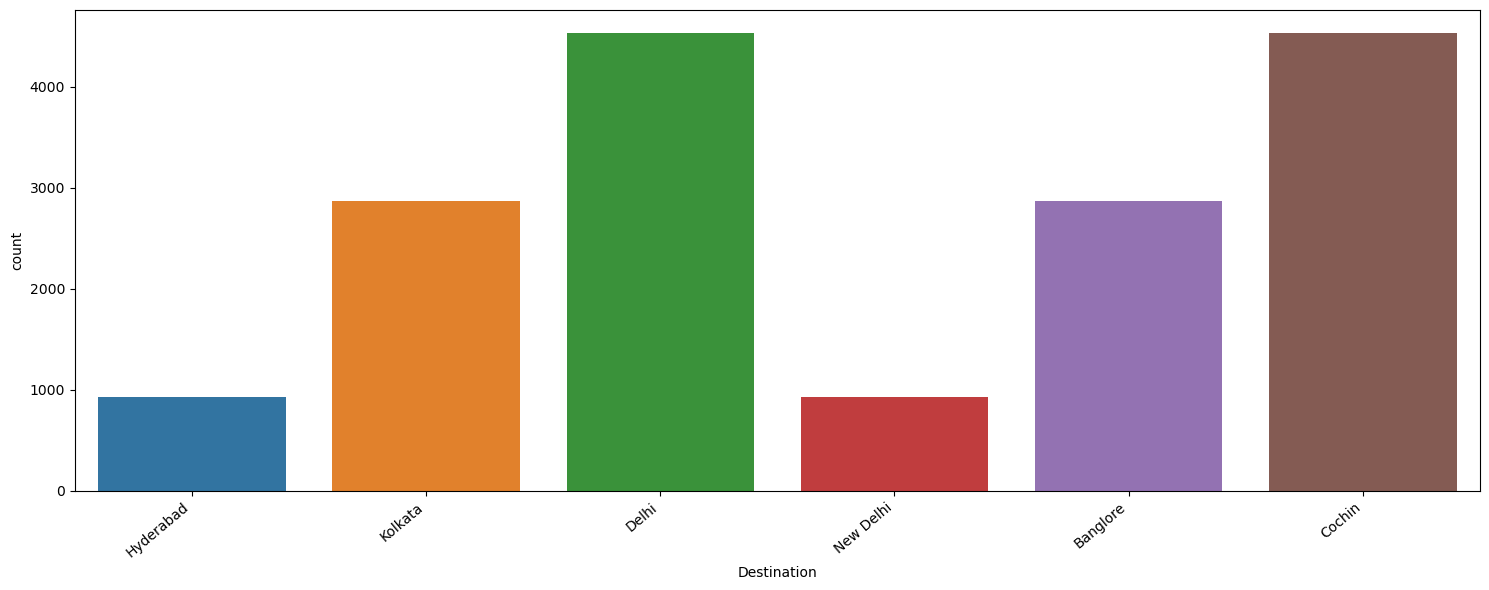

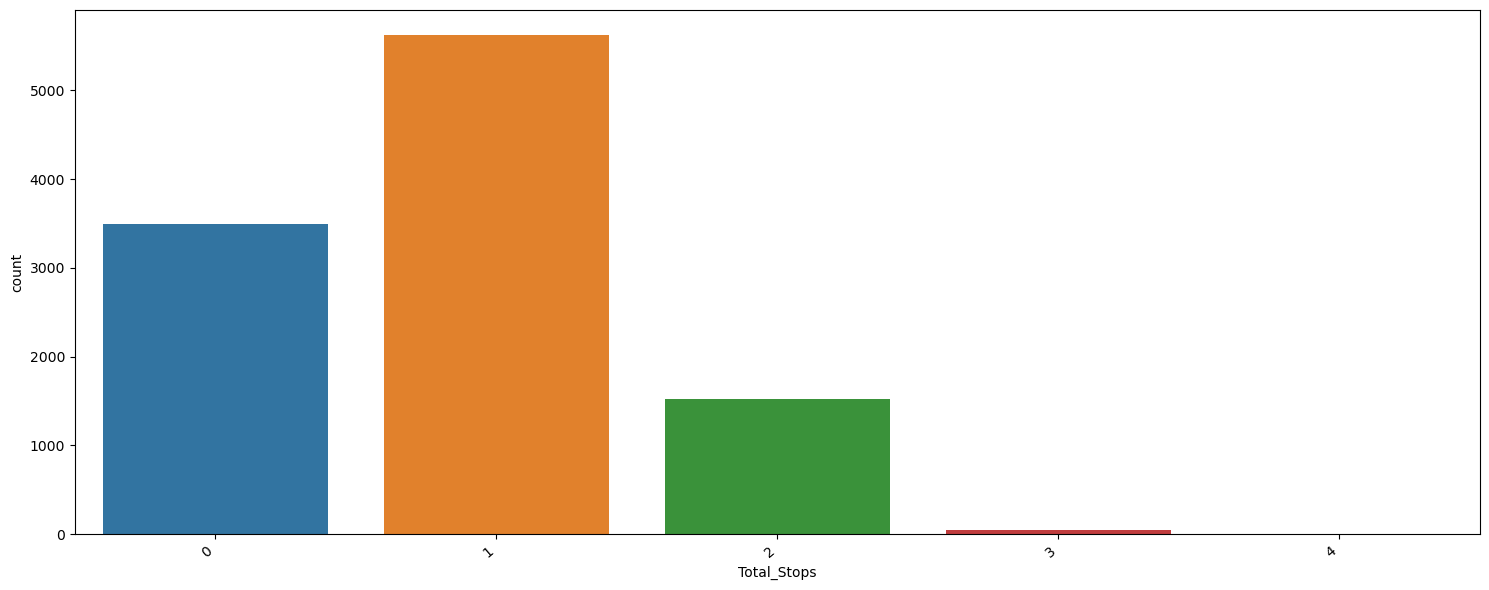

In [39]:
for i in ['Airline','Source','Destination','Total_Stops']:
    plt.figure(figsize = (15,6))
    sns.countplot(data = data, x=i)
    ax = sns.countplot(x=i, data = data.sort_values('Price', ascending = True))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [40]:
#airline
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

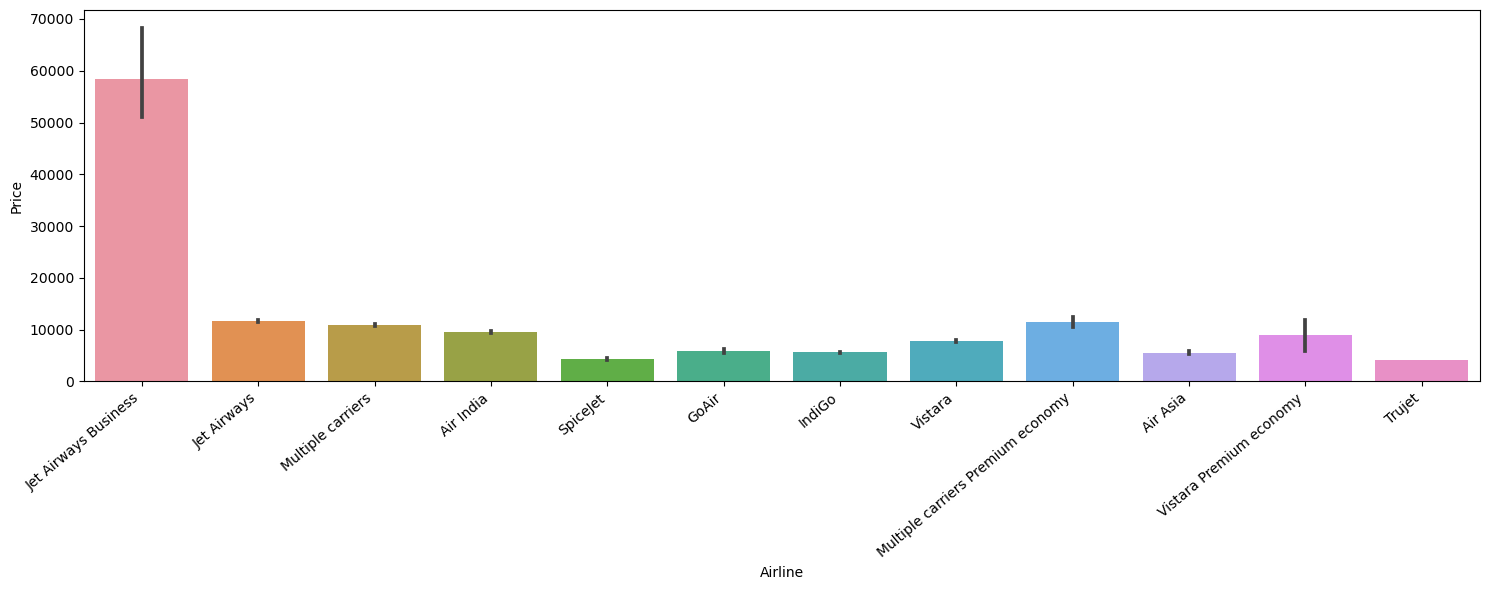

In [41]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

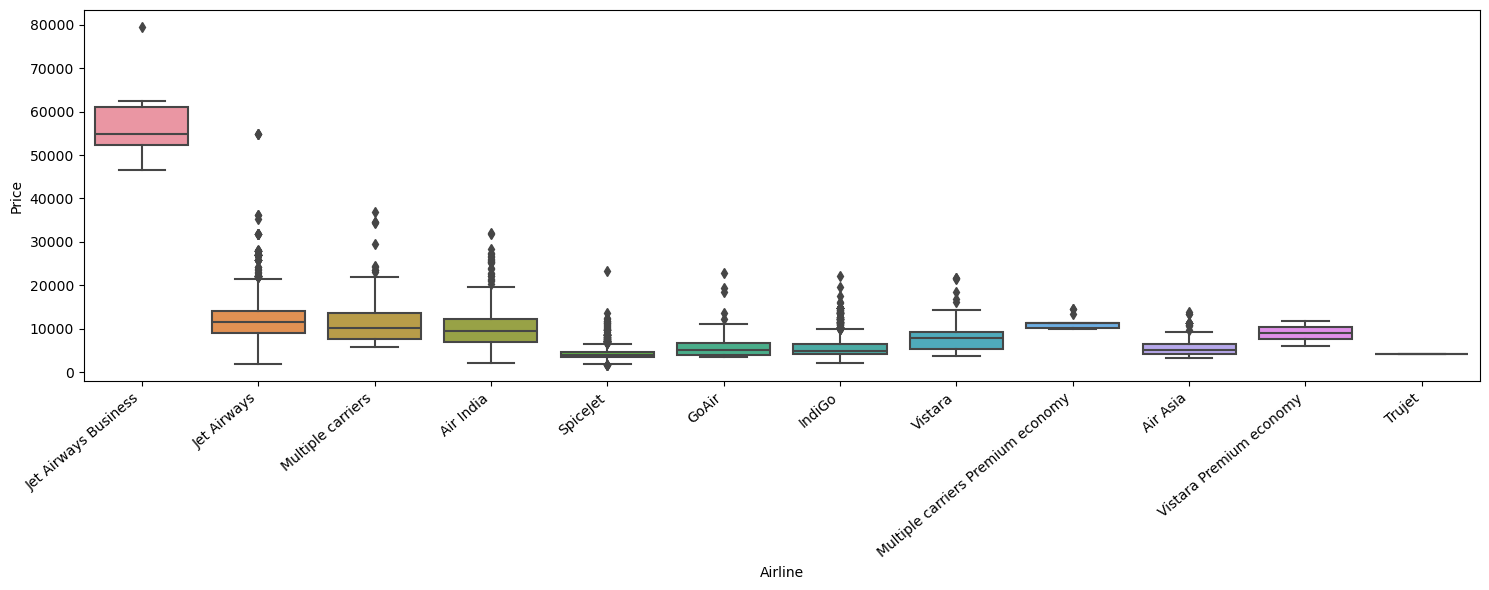

In [42]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

In [43]:
data.groupby('Airline').describe()['Price'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [44]:
Airline = pd.get_dummies(data['Airline'], drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [45]:
data = pd.concat([data, Airline], axis = 1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,False,True,False,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,False,True,False,False,False,False,False,False,False,False


In [46]:
data.drop('Airline', axis = 1, inplace = True)
data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,False,True,False,False,False,False,False,False,False,False
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,False,False,False,False,False,False,False,False,False,False
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,False,False,True,False,False,False,False,False,False,False
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,False,True,False,False,False,False,False,False,False,False
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,False,True,False,False,False,False,False,False,False,False


In [47]:
# source and destination
list1 = ['Source','Destination']
for l in list1:
    print(data[[l]].value_counts(), '\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [48]:
data = pd.get_dummies(data = data, columns = list1, drop_first = True)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,False,False,False,False,False,False,False,False,False,True


In [49]:
# Route
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [50]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [65]:
print(route.columns)
Route_1 = 'route_column'
Route_2 = 'route_column'
Route_3 = 'route_column'
Route_4 = 'route_column'
Route_5 = 'route_column'

Index(['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'], dtype='object')


In [64]:
# Assuming the 'Route' column is named 'route_column' in your DataFrame
route['Route_1'] = route['route_column'].str.split('→').str[0]
route['Route_2'] = route['route_column'].str.split('→').str[1]
route['Route_3'] = route['route_column'].str.split('→').str[2]
route['Route_4'] = route['route_column'].str.split('→').str[3]
route['Route_5'] = route['route_column'].str.split('→').str[4]

KeyError: 'route_column'

In [52]:
route.fillna('None', inplace = True)
route.head()

C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\2171952904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace = True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in range(1,6):
    col = 'Route_' + str(i)
    route[col] = le.fit_transform(route[col])
    
route.head()

C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\959327169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\959327169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\959327169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [54]:
route.drop('Route', axis = 1, inplace = True)
route.head()

C:\Users\khaja\AppData\Local\Temp\ipykernel_17636\2499507917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route', axis = 1, inplace = True)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [50]:
data = pd.concat([data, route], axis = 1)
data.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1,...,0,0,0,0,0,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9,...,1,0,0,0,0,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12,...,0,0,0,0,0,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1,...,0,0,0,0,1,0,34,8,13,5


In [51]:
data.drop('Route', axis = 1, inplace = True)
data.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,1,0,34,8,13,5


In [52]:
temp_col = data.columns.to_list()
print(temp_col, '\n')
new_col = temp_col[: 2] + temp_col[3:]
new_col.append(temp_col[2])
print(new_col, '\n')
data = data.reindex(columns = new_col)
data.head()

['Duration', 'Total_Stops', 'Price', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 

,Duration,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,5,1,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,6,9,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,5,12,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,3,1,0,0,...,0,0,0,1,0,34,8,13,5,13302


## 4. Splitting of Dataset

In [53]:
x = data.drop(columns='Price')
y = data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [54]:
# Columns of x
print("Columns of x:")
print(x.columns)

# Columns of y (since y is a Series, not a DataFrame)
print("\nColumn name of y:")
print(y.name)


Columns of x:
Index(['Duration', 'Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes',
       'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

Column name of y:
Price


In [55]:
print(x.dtypes)

Duration                             int64
Total_Stops                          int64
Dep_Time_in_hours                    int64
Dep_Time_in_minutes                  int64
Arrival_Time_in_hours                int64
Arrival_Time_in_minutes              int64
Day                                  int64
Month                                int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Source_Chennai                       uint8
Source_Delhi                         uint8
Source_Kolkata                       uint8
Source_Mumbai                        uint8
Destination

In [56]:
print(x.iloc[100])

Duration                             740
Total_Stops                            1
Dep_Time_in_hours                      8
Dep_Time_in_minutes                   25
Arrival_Time_in_hours                 20
Arrival_Time_in_minutes               45
Day                                   15
Month                                  5
Air India                              0
GoAir                                  0
IndiGo                                 0
Jet Airways                            1
Jet Airways Business                   0
Multiple carriers                      0
Multiple carriers Premium economy      0
SpiceJet                               0
Trujet                                 0
Vistara                                0
Vistara Premium economy                0
Source_Chennai                         0
Source_Delhi                           0
Source_Kolkata                         1
Source_Mumbai                          0
Destination_Cochin                     0
Destination_Delh

## 5. Model Building and Evaluation without Pre Processing data

In [57]:
# Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.61


In [58]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, Y_train)
dtree.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.61


In [59]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)
predictions = rf_regressor.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.81


In [60]:
# Ordinary Least Square Model
import statsmodels.api as sm
import statsmodels
model = sm.OLS(y, x)
results = model.fit()
results.params

Duration                                -0.121509
Total_Stops                           3105.372243
Dep_Time_in_hours                       12.021156
Dep_Time_in_minutes                      0.637817
Arrival_Time_in_hours                  -11.291607
Arrival_Time_in_minutes                  5.318275
Day                                    -75.202529
Month                                  -90.768521
Air India                             1896.680533
GoAir                                 -193.130620
IndiGo                                 486.969350
Jet Airways                           4199.227180
Jet Airways Business                 47249.113558
Multiple carriers                     3419.115598
Multiple carriers Premium economy     4250.173828
SpiceJet                               121.675186
Trujet                               -1612.791768
Vistara                               2326.634760
Vistara Premium economy               3564.112333
Source_Chennai                        -526.243064


In [61]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     642.8
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:37:56   Log-Likelihood:                -99989.
No. Observations:               10682   AIC:                         2.000e+05
Df Residuals:                   10653   BIC:                         2.002e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Durati

In [62]:
# Support Vector Regressor Model, AdaBoost Regressor Model, Bagging Regressor Model, Gradient Boost Regressor Model, XG Boost Regressor Model
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

SVR = SVR()
ABC = AdaBoostRegressor(n_estimators=100)
BC = BaggingRegressor(n_estimators=100)
GBC = GradientBoostingRegressor(n_estimators=100)
XGB = XGBRegressor(n_estimators=100, seed=555, eval_metric='rmse', use_label_encoder=False)

regressors = [SVR, ABC, BC, GBC, XGB]
regressor_names = ['Support Vector Regression', 'AdaBoost', 'Bagging', 'Gradient Boosting', 'XGBoost']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('5-fold cross-validation:\n')
for reg, name in zip(regressors, regressor_names):
    scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
    print(f"Train CV R-squared: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]")
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R-squared: {r2:.4f}\n")


5-fold cross-validation:

Train CV R-squared: 0.131 (+/- 0.027) [Support Vector Regression]
Test MSE: 18208261.6572
Test R-squared: 0.1555

Train CV R-squared: 0.316 (+/- 0.105) [AdaBoost]
Test MSE: 15076079.8490
Test R-squared: 0.3008

Train CV R-squared: 0.803 (+/- 0.016) [Bagging]
Test MSE: 4040239.4252
Test R-squared: 0.8126

Train CV R-squared: 0.782 (+/- 0.019) [Gradient Boosting]
Test MSE: 4127810.9433
Test R-squared: 0.8086

Train CV R-squared: 0.832 (+/- 0.018) [XGBoost]
Test MSE: 2920100.2795
Test R-squared: 0.8646



  ## 6. Preprocessing of Dataset before model building and evaluation

Why Preprocessing ???
To increase the efficacy of our predictions.

1. Standard Scaler
    * Mean is 0, variance is 1

In [63]:
# Scaling of Data with Standard Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y)

In [64]:
# Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.65


In [65]:
# Decison Tree Model
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, Y_train)
dtree.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.65


In [66]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)
predictions = rf_regressor.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.82


In [67]:
# Ordinary Least Square Model
import statsmodels.api as sm
import statsmodels
model = sm.OLS(y, x_scaled)
results = model.fit()
results.params

x1      -61.699602
x2     2096.738389
x3       69.104229
x4       11.969861
x5      -77.449090
x6       87.783640
x7     -662.037004
x8     -271.169671
x9      702.157810
x10     -25.789669
x11     191.877373
x12    2016.027552
x13    1119.492012
x14    1078.123123
x15     148.179339
x16      32.355836
x17     -15.603847
x18     481.512248
x19      59.720678
x20      25.325768
x21      -8.198538
x22    -142.919004
x23    -129.915128
x24      -8.198538
x25    -213.651437
x26    -129.915128
x27      25.325768
x28     580.550986
x29    -126.160061
x30    -453.124870
x31    -297.719293
x32     160.829383
x33      93.440049
dtype: float64

In [68]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.129
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              56.17
Date:                Tue, 05 Dec 2023   Prob (F-statistic):                   3.40e-292
Time:                        13:39:10   Log-Likelihood:                     -1.1301e+05
No. Observations:               10682   AIC:                                  2.261e+05
Df Residuals:                   10654   BIC:                                  2.263e+05
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
# Support Vector Regressor Model, AdaBoost Regressor Model, Bagging Regressor Model, Gradient Boost Regressor Model, XG Boost Regressor Model
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example models for regression
SVR = SVR()
ABC = AdaBoostRegressor(n_estimators=100)
BC = BaggingRegressor(n_estimators=100)
GBC = GradientBoostingRegressor(n_estimators=100)
XGB = XGBRegressor(n_estimators=100, seed=555, eval_metric='rmse', use_label_encoder=False)

regressors = [SVR, ABC, BC, GBC, XGB]
regressor_names = ['Support Vector Regression', 'AdaBoost', 'Bagging', 'Gradient Boosting', 'XGBoost']

# Splitting data into train and test sets
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y)

print('5-fold cross-validation:\n')
for reg, name in zip(regressors, regressor_names):
    scores = cross_val_score(reg, X_train, Y_train, cv=5, scoring='r2')
    print(f"Train CV R-squared: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]")
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R-squared: {r2:.4f}\n")

5-fold cross-validation:

Train CV R-squared: 0.045 (+/- 0.009) [Support Vector Regression]
Test MSE: 21201105.6831
Test R-squared: 0.0575

Train CV R-squared: -0.092 (+/- 0.441) [AdaBoost]
Test MSE: 20162715.9853
Test R-squared: 0.1037

Train CV R-squared: 0.798 (+/- 0.018) [Bagging]
Test MSE: 4445256.5498
Test R-squared: 0.8024

Train CV R-squared: 0.778 (+/- 0.029) [Gradient Boosting]
Test MSE: 4684549.5691
Test R-squared: 0.7917

Train CV R-squared: 0.823 (+/- 0.023) [XGBoost]
Test MSE: 3373038.7871
Test R-squared: 0.8500



2. Robust Scaler
    * Similar to Standard Scaler, but uses median and quartiles as opposed to mean and variance
    * Result: Resistant to outliers, just like robust regressors etc

In [70]:
# Scaling the data with Robust Scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y)

In [71]:
# Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.65


In [72]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, Y_train)
dtree.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.65


In [73]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, Y_train)
predictions = rf_regressor.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('R-squared score: {:.2f}'.format(r2))

R-squared score: 0.82


In [74]:
# Ordinary Least Square Model
import statsmodels.api as sm
import statsmodels
model = sm.OLS(y, x_scaled)
results = model.fit()
results.params

x1       -92.346541
x2      3105.372243
x3       120.211563
x4        22.323592
x5      -124.207678
x6       132.956881
x7     -1203.240462
x8      -272.305564
x9      1896.680533
x10     -193.130620
x11      486.969350
x12     4199.227180
x13    47249.113558
x14     3419.115598
x15     4250.173828
x16      121.675186
x17    -1612.791768
x18     2326.634760
x19     3564.112333
x20     6036.090404
x21     5002.274792
x22     7953.994610
x23     2731.472876
x24     5002.274792
x25     4092.452030
x26     2731.472876
x27     6036.090404
x28     6810.917753
x29    -3731.878421
x30     -396.184541
x31     -658.548464
x32       54.555683
x33      354.072677
dtype: float64

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     642.8
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:40:17   Log-Likelihood:                -99989.
No. Observations:               10682   AIC:                         2.000e+05
Df Residuals:                   10653   BIC:                         2.002e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -92.3465     66.134     -1.396      0.1

In [76]:
# Support Vector Regressor Model, AdaBoost Regressor Model, Bagging Regressor Model, Gradient Boost Regressor Model, XG Boost Regressor Model
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Example models for regression
SVR = SVR()
ABC = AdaBoostRegressor(n_estimators=100)
BC = BaggingRegressor(n_estimators=100)
GBC = GradientBoostingRegressor(n_estimators=100)
XGB = XGBRegressor(n_estimators=100, seed=555, eval_metric='rmse', use_label_encoder=False)

regressors = [SVR, ABC, BC, GBC, XGB]
regressor_names = ['Support Vector Regression', 'AdaBoost', 'Bagging', 'Gradient Boosting', 'XGBoost']

# Splitting data into train and test sets
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y)

print('5-fold cross-validation:\n')
for reg, name in zip(regressors, regressor_names):
    scores = cross_val_score(reg, X_train, Y_train, cv=5, scoring='r2')
    print(f"Train CV R-squared: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]")
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R-squared: {r2:.4f}\n")


5-fold cross-validation:

Train CV R-squared: 0.050 (+/- 0.008) [Support Vector Regression]
Test MSE: 19649426.8925
Test MAE: 3273.5138
Test R-squared: 0.0692

Train CV R-squared: 0.430 (+/- 0.061) [AdaBoost]
Test MSE: 10771309.0664
Test MAE: 2729.7406
Test R-squared: 0.4898

Train CV R-squared: 0.802 (+/- 0.022) [Bagging]
Test MSE: 4535752.0632
Test MAE: 1170.9644
Test R-squared: 0.7851

Train CV R-squared: 0.778 (+/- 0.017) [Gradient Boosting]
Test MSE: 4254112.4950
Test MAE: 1411.9073
Test R-squared: 0.7985

Train CV R-squared: 0.836 (+/- 0.010) [XGBoost]
Test MSE: 3475493.1100
Test MAE: 1136.2159
Test R-squared: 0.8354



# 8. Summary of Models' Performances

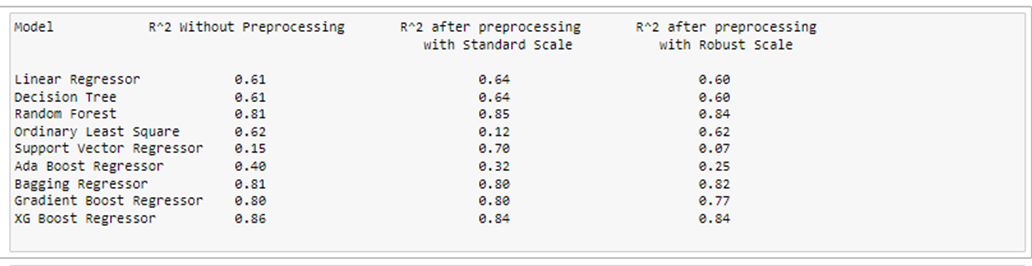

Model             Mean Absolute Error               Mean Absolute Error after                   Mean Absolute Error after
                  without Preprocessing             preprocessing with standard scale           preprocessing with Robust Scale
                

Linear Regressor             0.45                          0.38                                    0.42
Decision Tree                0.43                          0.40                                    0.41
Random Forest                0.17                          0.11                                    0.13
Ordinary Least Square        0.41                          0.85                                    0.35
Support Vector Regressor     0.88                          0.27                                    0.91
Ada Boost Regressor          0.62                          0.68                                    0.75
Bagging Regressor            0.15                          0.19                                    0.15
Gradient Boost Regressor     0.13                          0.18                                    0.20
XG Boost Regressor           0.10                          0.14                                    0.14

## 9. Flight Ticket Fare Prediction

In [77]:
# Assuming 'input_data' contains a single data point for prediction, with the same features as your training data
input_data = pd.DataFrame({
    'Duration': [740],
    'Total_Stops': [1],
    'Dep_Time_in_hours': [8],
    'Dep_Time_in_minutes': [25],
    'Arrival_Time_in_hours': [20],
    'Arrival_Time_in_minutes': [45],
    'Day': [15],
    'Month': [5],
    'Air India': [0],
    'GoAir': [0],
    'IndiGo': [0],
    'Jet Airways': [1],
    'Jet Airways Business': [0],
    'Multiple carriers': [0],
    'Multiple carriers Premium economy': [0],
    'SpiceJet': [0],
    'Trujet': [0],
    'Vistara': [0],
    'Vistara Premium economy': [0],
    'Source_Chennai': [0],
    'Source_Delhi': [0],
    'Source_Kolkata': [1],
    'Source_Mumbai': [0],
    'Destination_Cochin': [0],
    'Destination_Delhi': [0],
    'Destination_Hyderabad': [0],
    'Destination_Kolkata': [0],
    'Destination_New Delhi': [0],
    'Route_1': [2],
    'Route_2': [7],
    'Route_3': [3],
    'Route_4': [13],
    'Route_5': [5]
})

# Predict using the trained model
output_prediction = XGB.predict(input_data)

print(f"Ticket Fare is: {output_prediction}")


Ticket Fare is: [11234.074]
